In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

neighborhoods = gpd.read_file('neighborhoods.geojson')

neighborhoods.head()

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,West Meade,"MULTIPOLYGON (((-86.90384 36.12554, -86.90328 ..."
4,White Bridge,"MULTIPOLYGON (((-86.86321 36.12886, -86.86321 ..."


In [ ]:
urban_polygon = neighborhoods.loc[neighborhoods['name'] == 'Urban Residents']

# Print the head of the urban polygon 
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.area / 10**6
print('The area of the Urban Residents neighborhood is ', area[0],' km squared')

<class 'geopandas.geoseries.GeoSeries'>


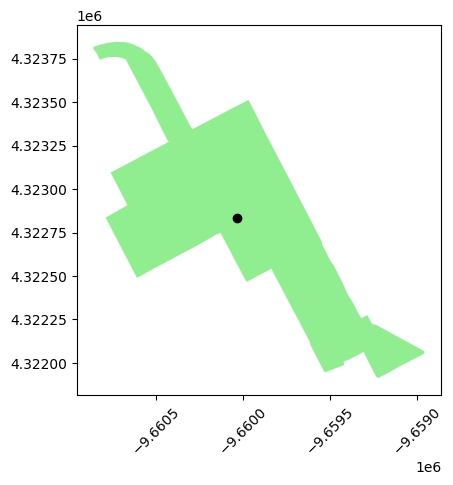

In [7]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

In [ ]:
# Import packages
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

In [ ]:
# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)

# Print the art_distances
pprint.pprint(art_distances)

Create a folium location from the urban centroid

In [ ]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.center[0]

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

In [ ]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

# Display the map
display(downtown_map)

### Folium street map of the downtown neighborhood
This time you will create the folium map of downtown and add the Urban Residents neighborhood area from urban_polygon. The urban_polygon has been printed to your console.

In [ ]:



# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center[0]
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

Adding markers for the public art

Now that you have added the polygon for the Urban Residents neighborhood to your folium street map, it's time to add the locations of the art within the neighborhood. You can do that by creating folium markers. Each marker needs a location assigned. Use iterrows() to loop through the data to grab the values you need.

In [ ]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

In [ ]:
# Print the urban_art titles
print(urban_art.title)

#Print the urban_art descriptions
print(urban_art.desc)

# Replace Nan and ' values in description
urban_art.desc.fillna('', inplace = True)
urban_art.desc = urban_art.desc.str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art.desc)

In [ ]:
# Construct downtown map
downtown_map = folium.Map(location = nashville, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['title'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)